In [6]:
import pandas as pd
import numpy as np 
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline  
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")



In [7]:
cards_data = pd.read_csv("/Users/briankalinowski/Desktop/kaggle/fakefraud.csv")

In [8]:
cards_data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [9]:
cards_data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [10]:
cards_data.isFraud.value_counts()


0    6354407
1       8213
Name: isFraud, dtype: int64

In [11]:
cards_data.isFlaggedFraud.value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

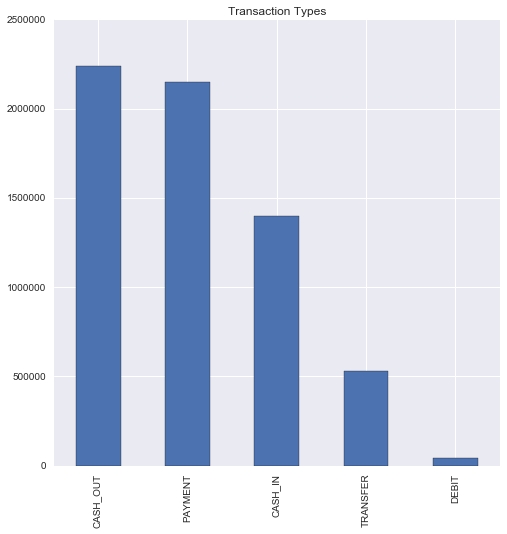

In [32]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))

cards_data['type'].value_counts().plot(kind='bar', 
                                       title='Transaction Types', ax=ax, figsize=(8,8))

In [14]:
# lets find the accounts that were emptied!

empty_accounts = cards_data[cards_data['newbalanceOrig'] == 0.00]
empty_accounts.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0
8,1,PAYMENT,4024.36,C1265012928,2671.0,0.0,M1176932104,0.0,0.00,0,0
10,1,DEBIT,9644.94,C1900366749,4465.0,0.0,C997608398,10845.0,157982.12,0,0
13,1,PAYMENT,11633.76,C1716932897,10127.0,0.0,M801569151,0.0,0.00,0,0


In [15]:
#only missing 160 fraud transactions
empty_accounts['isFraud'].value_counts()

0    3601513
1       8053
Name: isFraud, dtype: int64

In [16]:
# and none were flagged! 
empty_accounts.isFlaggedFraud.value_counts()


0    3609566
Name: isFlaggedFraud, dtype: int64

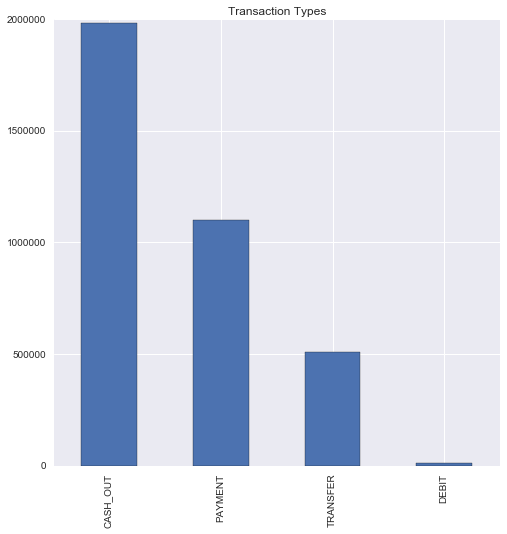

In [18]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))

empty_accounts['type'].value_counts().plot(kind='bar', title="Transaction Types",
                                          ax=ax, figsize=(8,8))


In [ ]:
# what types of transactions are being flagged?

ax = empty_accounts.groupby(['type', 'isFlaggedFraud']).size().plot(kind='bar')
ax.set_title("Number of Transactions per Type Flagged as Fraud")
ax.set_xlabel('Type of transaction')
ax.set_ylabel("Count of Transactions")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))